<a href="https://colab.research.google.com/github/anaapbernardo/Bootcamp_DataScience/blob/main/Challenges_Bootcamp_Data_Science_Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of dataset PeNSE 2015 - sample 2 (IBGE)

Source: https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/

In [ ]:
import pandas as pd
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# 1.   Education, health, and data type



## Reading zip folder

In [ ]:
url = '/content/drive/MyDrive/Bootcamp Data Science/Mod3/PeNSE_2015_AMOSTRA2.zip'
zip_folder = ZipFile(url)

In [ ]:
zip_folder.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [ ]:
zip_folder.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [ ]:
# Selecting file and reading the dataset

zip_folder_file = zip_folder.namelist()[1]
df = pd.read_csv(zip_folder.open(zip_folder_file), sep=';')
df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,1570.00,"37,1",157,2,1,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,1520.00,"50,2",152,2,2,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,1614.00,"48,2","161,4",2,2,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,1725.00,"69,4","172,5",2,3,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,"78,9","167,5",2,4,1223,1,"299,735235",1,2,4,1,5,1,296


### Challenge 01: unzip folder using Bash commands.

I kept the following code as #comment, otherwise it will try to unzip the folder everytime I run the notebook.

In [ ]:
# !unzip '/content/drive/MyDrive/Bootcamp Data Science/Mod3/PeNSE_2015_AMOSTRA2.zip' -d '/content/drive/MyDrive/Bootcamp Data Science/Mod3'

### Challenge 02: Study the data base that will be used in this module.

PeNSE is survey research that investigates information that makes it possible to know and measure the risk factors and health protection of teenagers.

The survey provides information about:
- Socioeconomic aspects;
- Social and family contexts; 
- Behavioral risk factors related to eating habits, physical inactivity, smoking, alcohol consumption and other drugs; 
- Sexual and reproductive health; 
- Exposure to accidents and violence;
- Hygiene habits; oral health; mental health;
- Perception of body image, among other topics. 

Characteristics of the school environment and surroundings are also considered, including information related to:
- Infrastructure available for food and physical activity; 
- Accessibility; 
- Sanitation; 
- Existence of rules and standards of conduct adopted by schools; 
- Health care policies;
- Safety level of the surroundings, among other aspects.

Source: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e

More information can be found at: 

https://biblioteca.ibge.gov.br/visualizacao/livros/liv97870.pdf

https://www.youtube.com/watch?v=z4BBCHZUvD4&ab_channel=IBGE

## Data type

In [ ]:
df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,1570.00,"37,1",157,2,1,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,1520.00,"50,2",152,2,2,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,1614.00,"48,2","161,4",2,2,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,1725.00,"69,4","172,5",2,3,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,"78,9","167,5",2,4,1223,1,"299,735235",1,2,4,1,5,1,296


In [ ]:
df.shape

(16556, 181)

In [ ]:
df.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(7), int64(171), object(3)
memory usage: 22.9+ MB


In [ ]:
df.select_dtypes(include='object')

,VB17003,VB17004,PESO
0,"37,1",157,"299,735235"
1,"50,2",152,"355,170081"
2,"48,2","161,4","299,735235"
3,"69,4","172,5","355,170081"
4,"78,9","167,5","299,735235"
...,...,...,...
16551,"56,7","167,9","447,815539"
16552,"61,9","185,8","592,50744"
16553,"60,9","159,4","401,131512"
16554,"47,3","157,8","442,718091"


The values above are 'object' because of the comma.

In [ ]:
# Setting the thousands and decimals as the international system

df = pd.read_csv(zip_folder.open(zip_folder_file), sep=';', thousands='.', decimal=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
df.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.00,15.00,0.00,15.00,60.00,371.00,1570.00,37.10,157.00,299.74
1,120.00,510.00,260.00,130.00,300.00,502.00,1520.00,50.20,152.00,355.17
2,0.00,585.00,130.00,455.00,420.00,482.00,1614.00,48.20,161.40,299.74
3,0.00,0.00,0.00,0.00,0.00,694.00,1725.00,69.40,172.50,355.17
4,30.00,165.00,90.00,45.00,60.00,789.00,1675.00,78.90,167.50,299.74
...,...,...,...,...,...,...,...,...,...,...
16551,30.00,400.00,110.00,260.00,240.00,567.00,1679.00,56.70,167.90,447.82
16552,20.00,800.00,325.00,455.00,240.00,619.00,1858.00,61.90,185.80,592.51
16553,0.00,0.00,0.00,0.00,60.00,609.00,1594.00,60.90,159.40,401.13
16554,75.00,215.00,35.00,105.00,120.00,473.00,1578.00,47.30,157.80,442.72


### Challenge 03: Classify the data as qualitative or quantitative.

For this challenge I chose 10 columns:

In [ ]:
df.columns[15:25]

Index(['VB01013', 'VB01014', 'VB01015A', 'VB01016', 'VB01017', 'VB01018',
       'VB01019', 'VB01020A', 'VB01021', 'VB01022'],
      dtype='object')



---


1.   VB01013 - Is there a residential phone in your house? Answers: Yes / No / Uninformed
**R: Nominal Qualitative**



---



2.   VB01014 - Do you have a cell phone? Answers: Yes / No / Uninformed
**R: Nominal Qualitative**



---



3.   VB01015A - Is there any type of computer in your house? Answers: Yes / No / Uninformed
**R: Nominal Qualitative**

---

4.   VB01016 - Is there internet connection in your house? Answers: Yes / No / Uninformed
**R: Nominal Qualitative**

---

5.   VB01017 - Does anybody living your house has a car? Answers: Yes / No / Uninformed
**R: Nominal Qualitative**

---

6.   VB01018 - Does anybody living your house has a motorcycle? Answers: Yes / No / Uninformed
**R: Nominal Qualitative**

---

7.   VB01019 - How many bathrooms (with shower) are in your house? Answers: None / 1 / 2 / 3 / 4 or more / Uninformed
**R: Discrete Quantitative**

---

8.   VB01020A - Is there a domestic employee working in your home, three or more days a week? Answers: Yes / No / Uninformed
**R: Nominal Qualitative**

---

9.   VB01021 - What grade are you at school? Answers: 5th Elem. / 6th Elem. / 7th Elem. / 8th Elem. / 1st High School / 2nd High School / 3th High School / Uninformed
**R: Ordinal Qualitative**

---

10.  VB01022 - What shift do you study? Answers: Morning / Intermediate / Afternoon / Full time / Uninformed
**R: Nominal Qualitative**

---




# Qualitative Data and Frequency Tables

## Frequency Table

In [ ]:
# Checking the number of males and females who answered the survey

df['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [ ]:
# Checking the percentage of males and females

df['VB01001'].value_counts(normalize = True) * 100

1   50.05
2   49.95
Name: VB01001, dtype: float64

The number of males and females who answered the survey were similar, about 50% of each gender. That was pre-settled to avoid biases in the research.

However, there are other questions that it will be possible to verify the difference in the frequency. For example, question VB11007 - Level of satisfaction with their own body

In [ ]:
frequency = df['VB11007'].value_counts()
percentage = df['VB11007'].value_counts(normalize=True)*100

In [ ]:
answers = {
    1: 'Very satisfied',
    2: 'Satisfied',
    3: 'Indifferent',
    4: 'Unsatisfied',
    5: 'Very unsatisfied',
    99: 'Uninformed'
}

dist_freq = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage })
dist_freq.rename(index = answers, inplace = True)
dist_freq.rename_axis('Satisfaction with the own body', axis=1, inplace = True)
dist_freq

Satisfaction with the own body,Frequency,Percentage
Satisfied,6920,41.80
Very satisfied,4608,27.83
Unsatisfied,2326,14.05
Indifferent,1807,10.91
Very unsatisfied,714,4.31
Uninformed,181,1.09


### Challenge 04: Create a function to generate frequency tables and analyze other informations

In [ ]:
# Defining a function to create a new frequency table

def create_freq_table(dataframe, selected_column, classes, index_title):

  freq = df[selected_column].value_counts()
  perc = df[selected_column].value_counts(normalize=True)*100

  df_freq = pd.DataFrame({'Frequency': freq, 'Percentage': perc})
  df_freq.rename(index = classes, inplace = True)
  df_freq.rename_axis(index_title, axis=1, inplace = True)
  
  return df_freq

In [ ]:
dict_body = {1: 'Very Thin', 
             2: 'Skinny',
             3: 'Normal',
             4: 'Fat',
             5: 'Very Fat',
             99: 'Uninformed'}

In [ ]:
create_freq_table(df, 'VB11001', dict_body, 'How do you consider yourself in relation to your body')

How do you consider yourself in relation to your body,Frequency,Percentage
Normal,8822,53.29
Skinny,3261,19.70
Fat,2951,17.82
Very Thin,952,5.75
Very Fat,411,2.48
Uninformed,159,0.96


In [ ]:
dict_weight = {1: 'Nothing',
               2: 'Trying to lose weight',
               3: 'Trying to gain weight',
               4: 'Trying to maintain the same weight',
               99: 'Uninformed'}

In [ ]:
create_freq_table(df, 'VB11002', dict_weight, 'What are you doing about your weight?')

What are you doing about your weight?,Frequency,Percentage
Nothing,6169,37.26
Trying to lose weight,4688,28.32
Trying to maintain the same weight,2859,17.27
Trying to gain weight,2674,16.15
Uninformed,166,1.00


Evaluating both frequency tables, it is possible to infer that despite most of the students consider having a 'normal' body, most of them are trying to do something about their weight, like lose, gain or maintain the weight.

# Continuous Data Frequency and Pandas CrossTab

## Quantitative Data and Frequency Tables

In [ ]:
# Calculating the student's BMI

df['BMI'] = df['VB17003'] / ((df['VB17004']/100)**2)
df['BMI']

0       15.05
1       21.73
2       18.50
3       23.32
4       28.12
         ... 
16551   20.11
16552   17.93
16553   23.97
16554   19.00
16555   23.30
Name: BMI, Length: 16556, dtype: float64

In [ ]:
# Classifying

classes = [0, 18.5, 25, 30, 60]
labels = ['Underweight', 'Normal Range', 'Overweight', 'Obese']

df['BMI_CLASSES'] = pd.cut(x = df['BMI'],
                           bins = classes,
                           labels = labels,
                           include_lowest = True)

df[['BMI', 'BMI_CLASSES']]

,BMI,BMI_CLASSES
0,15.05,Underweight
1,21.73,Normal Range
2,18.50,Normal Range
3,23.32,Normal Range
4,28.12,Overweight
...,...,...
16551,20.11,Normal Range
16552,17.93,Underweight
16553,23.97,Normal Range
16554,19.00,Normal Range


In [ ]:
create_freq_table(df, 'BMI_CLASSES', df['BMI_CLASSES'], index_title='Weight Status')

Weight Status,Frequency,Percentage
Normal Range,9188,55.50
Underweight,4975,30.05
Overweight,1760,10.63
Obese,633,3.82


## Sturge's rule and Pandas CrossTab

In [ ]:
df['VB17004'].min()

124.1

In [ ]:
df['VB17004'].max()

195.3

In [ ]:
sample_size = len(df)

k = int(1 + ((10/3)*np.log10(sample_size)))
k

15

In [ ]:
df['HEIGHT_CLASSES'] = pd.cut(x = df['VB17004'],
                              bins = k,
                              include_lowest = True)

create_freq_table(df, 'HEIGHT_CLASSES', df['HEIGHT_CLASSES'], 'Height classification')

Height classification,Frequency,Percentage
"(157.327, 162.073]",3110,18.78
"(152.58, 157.327]",2734,16.51
"(162.073, 166.82]",2550,15.40
"(166.82, 171.567]",2063,12.46
"(147.833, 152.58]",1782,10.76
"(171.567, 176.313]",1416,8.55
"(143.087, 147.833]",1012,6.11
"(176.313, 181.06]",749,4.52
"(138.34, 143.087]",484,2.92
"(181.06, 185.807]",300,1.81


In [ ]:
# Frequency table (normalized by total values): Level of satisfaction with their own body

cross_freq = pd.crosstab(df['VB11007'], df['VB01001'], normalize = True)
cross_freq.rename(index = answers, inplace = True)
cross_freq.rename(columns = {1: 'Male', 2: 'Female'}, inplace = True)
cross_freq

VB01001,Male,Female
VB11007,,
Very satisfied,0.16,0.12
Satisfied,0.21,0.21
Indifferent,0.06,0.05
Unsatisfied,0.05,0.09
Very unsatisfied,0.02,0.03
Uninformed,0.01,0.00


In [ ]:
# Frequency table (normalized by columns): Level of satisfaction with their own body

cross_freq = pd.crosstab(df['VB11007'], df['VB01001'], normalize = 'columns') * 100
cross_freq.rename(index = answers, inplace = True)
cross_freq.rename(columns = {1: 'Male', 2: 'Female'}, inplace = True)
cross_freq

VB01001,Male,Female
VB11007,,
Very satisfied,32.36,23.29
Satisfied,42.11,41.48
Indifferent,11.46,10.36
Unsatisfied,9.48,18.62
Very unsatisfied,3.14,5.49
Uninformed,1.44,0.75


In [ ]:
# Frequency table (normalized by index): Level of satisfaction with their own body

cross_freq = pd.crosstab(df['VB11007'], df['VB01001'], normalize = 'index') * 100
cross_freq.rename(index = answers, inplace = True)
cross_freq.rename(columns = {1: 'Male', 2: 'Female'}, inplace = True)
cross_freq

VB01001,Male,Female
VB11007,,
Very satisfied,58.20,41.80
Satisfied,50.43,49.57
Indifferent,52.57,47.43
Unsatisfied,33.79,66.21
Very unsatisfied,36.41,63.59
Uninformed,65.75,34.25


### Challenge 05: Create a frequency table for weight 

#### Verifying the data

In [ ]:
df['VB17003'].max()

171.5

In [ ]:
df.nlargest(5, 'VB17003')

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,BMI,BMI_CLASSES,HEIGHT_CLASSES
12099,2015,76,4,1,1,1,16,8,4,1,1,7,4,1,1,1,2,1,1,1,1,3,2,6,3,2,2,3,4,6,1,8,4,7,5,1,6,6,4,1,...,1,4,4,1,2,3,3,1,-1,1,-1,1,1,2,2,1,2,2,2,2,2,1715.00,1755.00,171.50,175.50,2,4,4122,4,750.59,1,1,2,-1,12100,269,615,55.68,Obese,"(171.567, 176.313]"
9149,2015,76,3,1,1,1,17,2,4,1,2,7,4,2,-1,1,1,1,1,1,2,2,2,7,4,2,2,5,1,8,4,1,1,8,8,1,1,1,5,1,...,1,1,4,2,-1,2,5,1,13,1,-1,1,2,1,2,2,2,2,2,2,2,1691.00,1759.00,169.10,175.90,2,4,3123,3,4300.85,1,1,2,-1,9150,200,48,54.65,Obese,"(171.567, 176.313]"
12408,2015,76,4,1,2,4,14,9,6,1,1,2,9,2,-1,2,2,2,2,1,2,3,2,1,3,2,2,6,1,2,2,1,1,3,2,1,4,1,-1,3,...,1,1,2,1,1,1,1,1,7,1,2,2,2,1,2,2,2,2,2,2,2,1582.00,998.00,158.20,165.90,1,4,4121,4,686.90,1,1,3,-1,12409,276,554,57.48,Obese,"(162.073, 166.82]"
11864,2015,76,4,1,1,1,15,1,6,1,1,8,4,2,-1,1,1,1,1,1,2,3,2,5,1,2,2,4,5,1,8,8,2,5,3,2,1,6,-1,2,...,4,3,4,1,2,3,4,5,-1,2,-1,1,2,1,2,2,1,1,1,2,1,1565.00,1740.00,156.50,174.00,2,4,4222,4,158.42,1,2,4,1,11865,263,568,51.69,Obese,"(171.567, 176.313]"
2460,2015,76,1,1,1,2,15,12,5,1,1,7,4,2,-1,2,1,1,1,1,2,2,2,5,1,1,2,5,3,7,2,3,4,6,2,1,1,4,5,1,...,3,3,4,2,-1,1,2,1,12,1,-1,2,2,1,2,2,2,2,2,2,2,1556.00,1820.00,155.60,182.00,2,4,1122,1,789.43,1,1,2,-1,2461,55,370,46.98,Obese,"(181.06, 185.807]"


In [ ]:
df['VB17003'].min()

0.8

In [ ]:
df.nsmallest(5, 'VB17003')

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,BMI,BMI_CLASSES,HEIGHT_CLASSES
15673,2015,76,5,1,1,4,12,3,9,1,1,8,4,1,1,2,1,1,1,1,1,2,2,2,3,1,2,2,3,8,1,8,1,4,3,1,6,1,1,1,...,1,3,4,1,2,1,2,2,1,1,-1,1,1,2,2,2,1,2,2,2,2,408.00,1418.00,0.80,141.80,2,2,5121,5,313.16,1,1,2,-1,15674,355,317,0.40,Underweight,"(138.34, 143.087]"
1287,2015,76,1,1,2,4,12,11,8,1,1,8,5,2,-1,2,2,2,2,2,2,1,2,2,3,2,2,6,5,3,1,8,8,8,4,1,5,1,-1,3,...,3,1,4,2,-1,3,2,1,-1,2,2,2,2,2,2,2,1,2,2,2,2,209.00,137.00,20.90,137.00,2,1,1111,1,1005.63,2,1,3,-1,1288,28,179,11.14,Underweight,"(133.593, 138.34]"
1729,2015,76,1,1,2,4,12,11,8,1,2,3,3,2,-1,2,1,2,1,2,2,2,2,2,3,2,2,4,1,2,1,4,4,7,1,1,5,1,1,1,...,1,1,4,2,-1,2,3,1,5,1,1,2,2,2,2,2,1,2,2,2,2,221.00,1290.00,22.10,129.00,2,1,1121,1,446.99,1,1,3,-1,1730,39,508,13.28,Underweight,"(128.847, 133.593]"
7394,2015,76,3,1,2,99,11,2,10,1,1,8,3,2,-1,2,2,2,2,2,1,2,2,1,3,99,2,6,5,8,1,8,6,7,5,1,1,1,4,1,...,1,1,4,1,1,1,1,1,99,1,1,2,2,2,2,2,2,1,2,2,2,229.00,1372.00,22.90,137.20,2,1,3121,3,1270.84,1,1,3,-1,7395,164,37,12.17,Underweight,"(133.593, 138.34]"
16182,2015,76,5,1,1,1,11,11,9,1,1,5,8,2,-1,2,1,1,1,1,2,3,2,1,3,1,2,6,3,8,1,8,3,4,3,5,1,1,-1,2,...,2,2,4,2,-1,1,1,2,1,1,-1,2,2,2,2,2,1,1,2,2,2,236.00,1375.00,23.60,137.50,2,1,5121,5,165.18,1,1,2,-1,16183,364,104,12.48,Underweight,"(133.593, 138.34]"


The minimum weight (0.8 kg) seems to be a typo. Checking the column VB17001, it is possible to notice that the right value is 40.8kg. Thus, the 0.8 will be replaced by 40.8.

In [ ]:
df['VB17003'].replace(0.8, 40.8, inplace=True)

In [ ]:
df['VB17003'].min()

20.9

#### Creating a frequency table

In [ ]:
df['WEIGHT_CLASSES'] = pd.cut(x = df['VB17003'],
                              bins = k,
                              include_lowest = True)

create_freq_table(df, 'WEIGHT_CLASSES', df['WEIGHT_CLASSES'], 'Weight classification')

Weight classification,Frequency,Percentage
"(51.02, 61.06]",4760,28.75
"(40.98, 51.02]",4697,28.37
"(61.06, 71.1]",2628,15.87
"(30.94, 40.98]",2224,13.43
"(71.1, 81.14]",1098,6.63
"(81.14, 91.18]",475,2.87
"(20.747999999999998, 30.94]",330,1.99
"(91.18, 101.22]",183,1.11
"(101.22, 111.26]",98,0.59
"(111.26, 121.3]",29,0.18


### Challenge 06: Create other CrossTab. Search about the parameter aggfunc and test.

In [ ]:
# Level of satisfaction with the own body using absolute numbers

cross_freq_satisfaction_sum = pd.crosstab(df['VB11007'], df['BMI_CLASSES'], values=df['VB11007'], aggfunc=np.sum)
cross_freq_satisfaction_sum.rename(index = answers, inplace = True)
cross_freq_satisfaction_sum.rename_axis('Level of satisfaction with the own body', axis=0, inplace = True)
cross_freq_satisfaction_sum

BMI_CLASSES,Underweight,Normal Range,Overweight,Obese
Level of satisfaction with the own body,,,,
Very satisfied,1783,2461,297,67
Satisfied,4102,8306,1136,296
Indifferent,1380,2835,816,390
Unsatisfied,1808,4884,1824,788
Very unsatisfied,850,1520,765,435
Uninformed,5841,10296,1386,396


In [ ]:
# Level of satisfaction with the own body by BMI class (percentage)

cross_freq_satisfaction = pd.crosstab(df['VB11007'], df['BMI_CLASSES'], normalize = 'columns') * 100
cross_freq_satisfaction.rename(index = answers, inplace = True)
cross_freq_satisfaction.rename_axis('Level of satisfaction with the own body', axis=0, inplace = True)
cross_freq_satisfaction

BMI_CLASSES,Underweight,Normal Range,Overweight,Obese
Level of satisfaction with the own body,,,,
Very satisfied,35.84,26.78,16.88,10.58
Satisfied,41.23,45.20,32.27,23.38
Indifferent,9.25,10.29,15.45,20.54
Unsatisfied,9.09,13.29,25.91,31.12
Very unsatisfied,3.42,3.31,8.69,13.74
Uninformed,1.19,1.13,0.80,0.63


In [ ]:
# What are you doing about your weight by BMI classes (absolute numbers)

cross_freq_weight_sum = pd.crosstab(df['VB11002'], df['BMI_CLASSES'], values=df['VB11002'], aggfunc=np.sum)
cross_freq_weight_sum.rename(index = dict_weight, inplace = True)
cross_freq_weight_sum.rename_axis('What are you doing about your weight?', axis=0, inplace = True)
cross_freq_weight_sum

BMI_CLASSES,Underweight,Normal Range,Overweight,Obese
What are you doing about your weight?,,,,
Nothing,2193,3425,426,125
Trying to lose weight,662,5528,2250,936
Trying to gain weight,4779,3114,111,18
Trying to maintain the same weight,3200,7464,644,128
Uninformed,5742,9405,1089,198


In [ ]:
# What are you doing about your weight by BMI classes (percentage)

cross_freq_weight = pd.crosstab(df['VB11002'], df['BMI_CLASSES'], normalize='columns') * 100
cross_freq_weight.rename(index = dict_weight, inplace = True)
cross_freq_weight.rename_axis('What are you doing about your weight?', axis=0, inplace = True)
cross_freq_weight

BMI_CLASSES,Underweight,Normal Range,Overweight,Obese
What are you doing about your weight?,,,,
Nothing,44.08,37.28,24.20,19.75
Trying to lose weight,6.65,30.08,63.92,73.93
Trying to gain weight,32.02,11.30,2.10,0.95
Trying to maintain the same weight,16.08,20.31,9.15,5.06
Uninformed,1.17,1.03,0.62,0.32


# Histogram and Boxplot

## Histogram and Distribuitions

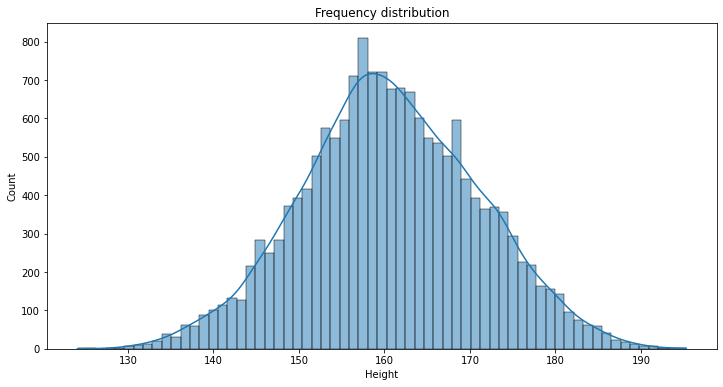

In [ ]:
# Histogram
ax = sns.histplot(x = 'VB17004', data = df, kde = True)

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution')
ax.set_xlabel('Height')

ax;

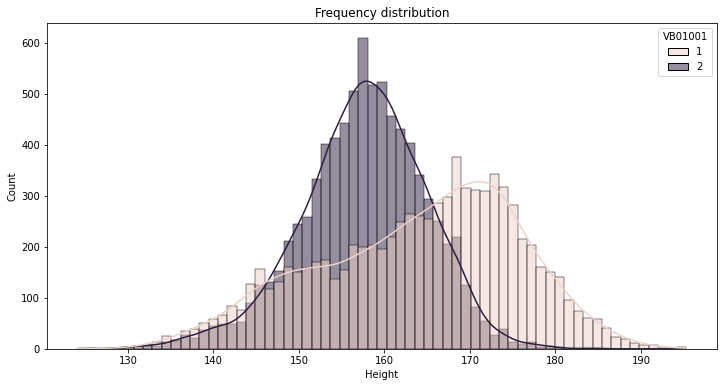

In [ ]:
# Histogram
ax = sns.histplot(x = 'VB17004', data = df, kde = True, hue = 'VB01001')

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution')
ax.set_xlabel('Height')

ax;

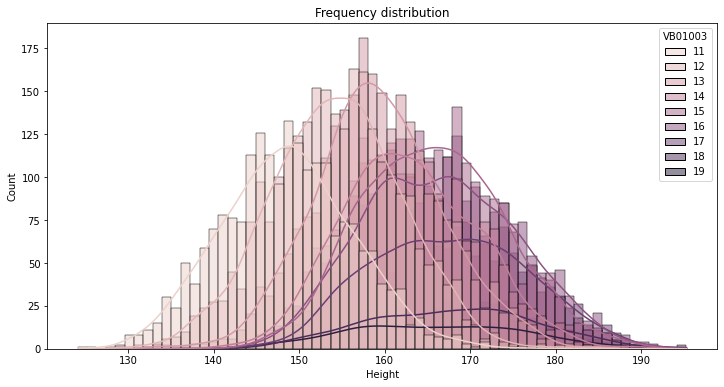

In [ ]:
# Histogram
ax = sns.histplot(x = 'VB17004', data = df, kde = True, hue = 'VB01003')

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution')
ax.set_xlabel('Height')

ax;

When there are many classes (age), the histogram is difficult to understand.

### Challenge 07: Calculate the standard deviation, mean, mode, and median, and plot on the histogram.

In [ ]:
# Mean, median, mode, std

height_mean = df['VB17004'].mean()
height_median = df['VB17004'].median()
height_mode = df['VB17004'].mode()[0]
height_std = df['VB17004'].std()

print(f'Mean: {round(height_mean, 2)}, Median: {round(height_median, 2)}, Mode: {round(height_mode, 2)}, Standard deviation: {round(height_std, 2)}')

Mean: 160.71, Median: 160.4, Mode: 160.0, Standard deviation: 10.34


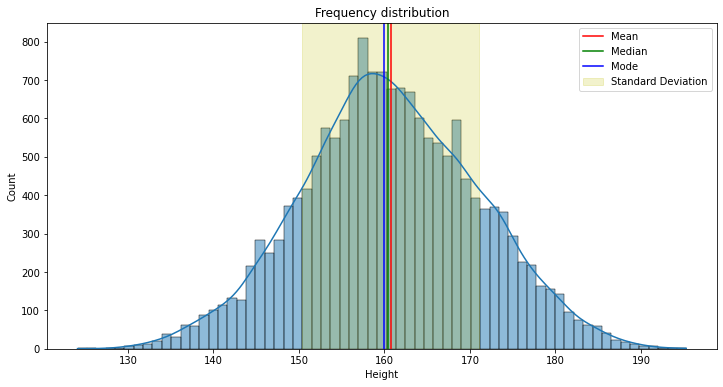

In [ ]:
# Histogram
ax = sns.histplot(x = 'VB17004', data = df, kde = True)

# Mean, median, mode, and std lines
ax.axvline(height_mean, color='r', linestyle='-', label='Mean')
ax.axvline(height_median, color='g', linestyle='-', label='Median')
ax.axvline(height_mode, color='b', linestyle='-', label='Mode')
ax.axvspan((height_mean + height_std), (height_mean - height_std), alpha=0.2, color='y', label='Standard Deviation')

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution')
ax.set_xlabel('Height')
plt.legend()

ax;

### Challenge 08: Plot a histogram using another information in the database.

In [ ]:
# Mean, median, mode, std

weight_mean = df['VB17003'].mean()
weight_median = df['VB17003'].median()
weight_mode = df['VB17003'].mode()[0]
weight_std = df['VB17003'].std()

print(f'Mean: {round(height_mean, 2)}, Median: {round(height_median, 2)}, Mode: {round(height_mode, 2)}, Standard deviation: {round(height_std, 2)}')

Mean: 160.71, Median: 160.4, Mode: 160.0, Standard deviation: 10.34


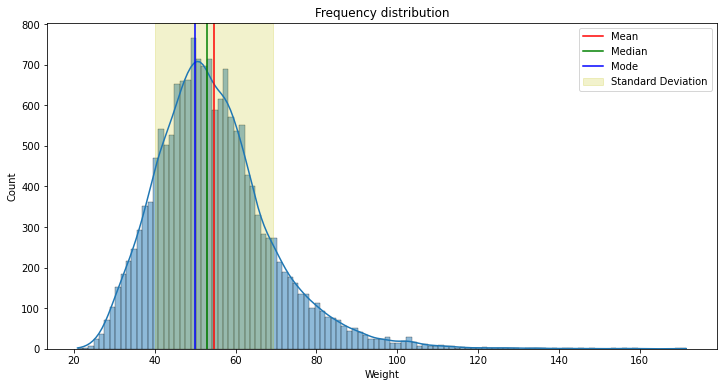

In [ ]:
# Histogram
ax = sns.histplot(x = 'VB17003', data = df, kde = True)

# Mean, median, mode, and std lines
ax.axvline(weight_mean, color='r', linestyle='-', label='Mean')
ax.axvline(weight_median, color='g', linestyle='-', label='Median')
ax.axvline(weight_mode, color='b', linestyle='-', label='Mode')
ax.axvspan((weight_mean + weight_std), (weight_mean - weight_std), alpha=0.2, color='y', label='Standard Deviation')

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution')
ax.set_xlabel('Weight')
plt.legend()

ax;

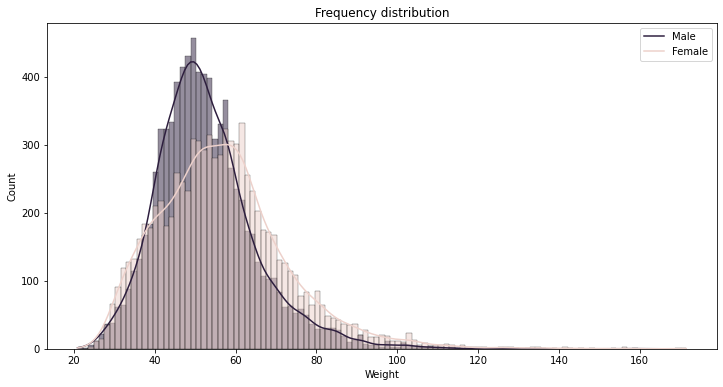

In [ ]:
# Histogram
ax = sns.histplot(x = 'VB17003', kde = True, hue = 'VB01001', data = df)

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution')
ax.set_xlabel('Weight')
ax.legend(labels=['Male', 'Female'])

ax;

## Boxplot and Separatrices

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


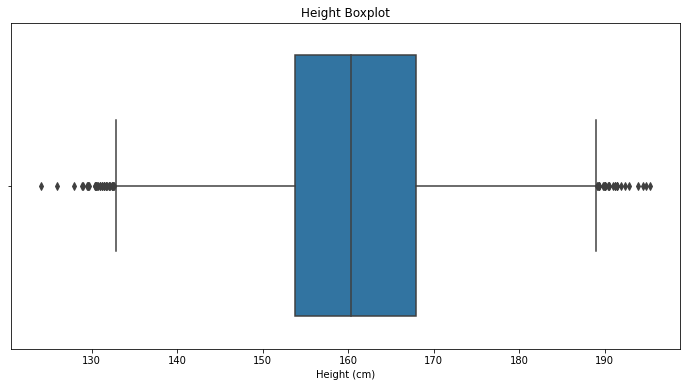

In [ ]:
# Boxplot
ax = sns.boxplot(df['VB17004'])

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Height Boxplot')
ax.set_xlabel('Height (cm)')

ax;

In [ ]:
df['VB17004'].quantile(0.25)

153.8

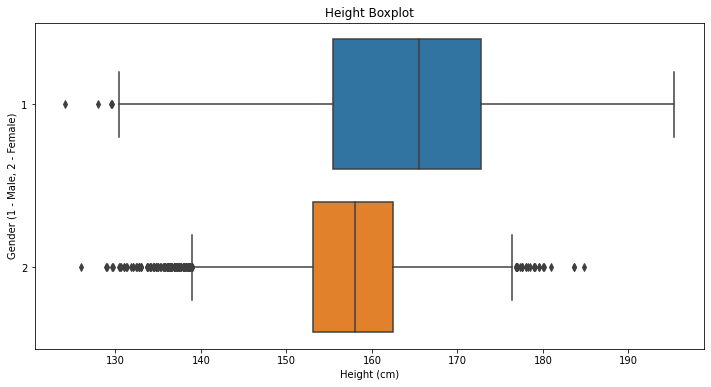

In [ ]:
# Boxplot
ax = sns.boxplot(x='VB17004', y='VB01001', data=df, orient='h')

#Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Height Boxplot')
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Gender (1 - Male, 2 - Female)')

ax;

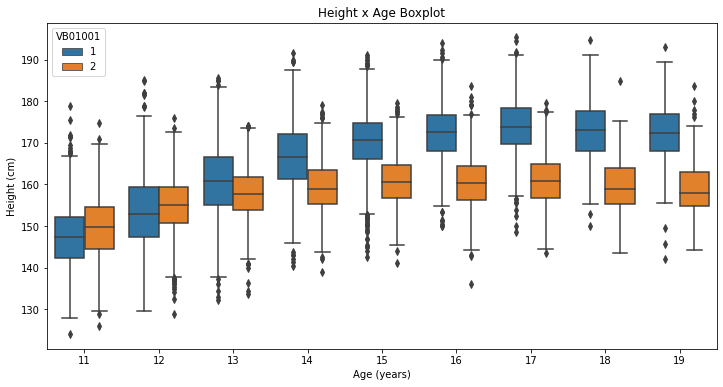

In [ ]:
# Boxplot
ax = sns.boxplot(x='VB01003', y='VB17004', hue='VB01001', data=df)

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Height x Age Boxplot')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Height (cm)')

ax;

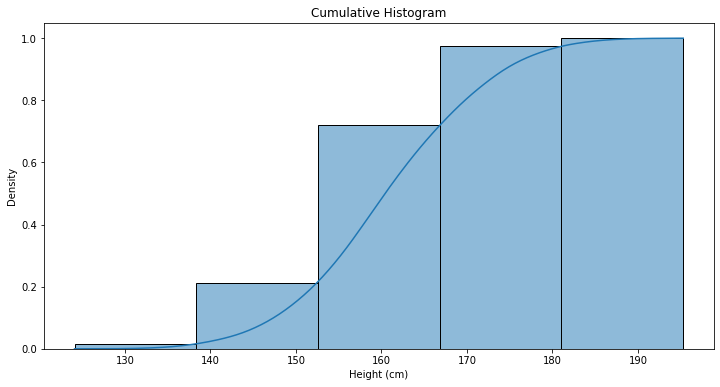

In [ ]:
# Cumulative histogram
ax = sns.histplot(x='VB17004', kde=True, cumulative=True,
                  stat='density', bins=5,
                  data=df)

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Cumulative Histogram')
ax.set_xlabel('Height (cm)')

ax;

### Challenge 09: Research how outliers are determined in the seaborn boxplot.

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”, using a method that is a function of the inter-quartile range (IQR).

IQR = (upper quartile - lower quartile)

Whiskers = Limit ± (1.5 * IQR)

For a normal distribution, the IQR contains 50% of the sample, and the whiskers has about 99%. Values outside the whiskers are considered outliers.

*P.S.: The constant value in the whiskers calculation can be changed, according to how you want to include in the distribuition.*

**Source:** http://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
lower_quantil = df['VB17004'].quantile(0.25)
upper_quantil = df['VB17004'].quantile(0.75)

IQR = upper_quantil - lower_quantil
IQR

14.099999999999994

In [ ]:
inferior_limit = lower_quantil - (1.5 * IQR)
upper_limit = upper_quantil + (1.5 * IQR)

print(f'Inferior Limit: {round(inferior_limit, 2)}, Upper Limit: {round(upper_limit, 2)}')

Inferior Limit: 132.65, Upper Limit: 189.05


In [ ]:
lower_outliers = df['VB17004'][df['VB17004'] < inferior_limit]
lower_outliers

85      129.70
1144    132.00
1461    124.10
1728    131.50
1729    129.00
2044    131.00
2920    130.50
2931    132.60
2942    129.60
2947    131.70
3243    130.40
3255    131.70
3393    128.00
3662    132.40
4830    132.40
4972    132.50
6905    129.50
8298    131.40
8511    128.90
9325    130.70
9628    131.20
10293   132.50
10600   132.00
10720   130.40
10811   130.50
10813   126.00
11380   131.20
12542   132.20
14205   131.40
15391   129.60
15735   131.00
16039   130.60
16201   131.80
Name: VB17004, dtype: float64

In [ ]:
upper_outliers = df['VB17004'][df['VB17004'] > upper_limit]
upper_outliers

22      190.00
778     194.80
1930    192.90
4517    191.20
5407    190.00
5577    190.50
6408    190.10
6597    194.50
7324    191.50
8983    189.10
9204    189.20
9753    191.50
9967    192.40
10490   189.80
11327   190.00
11428   191.90
11802   189.30
12022   190.40
12033   195.30
12455   189.90
13349   191.20
13764   189.40
14348   191.00
14760   191.50
14945   193.90
14992   189.30
16471   190.50
Name: VB17004, dtype: float64

# Centrality and Dispersion Measures

## Centrality Measures

In [ ]:
df['VB17004'].mode()

0   160.00
dtype: float64

In [ ]:
df['VB17004'].mean()

160.71311307078818

In [ ]:
df.groupby('VB01001')['VB17004'].mean()

VB01001
1   163.86
2   157.56
Name: VB17004, dtype: float64

In [ ]:
df.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11        147.62
         12        153.70
         13        160.72
         14        166.41
         15        170.34
         16        172.42
         17        173.81
         18        173.02
         19        172.14
2        11        149.52
         12        154.97
         13        157.67
         14        159.34
         15        160.76
         16        160.39
         17        160.91
         18        159.44
         19        158.98
Name: VB17004, dtype: float64

### Challenge 10: Describe other information, analyze, and share the analysis on the Discord chanel.

In [ ]:
df['VB17003'].mode()

0   50.00
dtype: float64

In [ ]:
df['VB17003'].mean()

54.70799710074912

In [ ]:
df.groupby(['VB01001', 'VB01003'])[['VB17004', 'VB17003']].mean()

VB17004  VB17003
VB01001 VB01003                  
1       11        147.62    42.53
        12        153.70    47.05
        13        160.72    52.32
        14        166.41    57.89
        15        170.34    62.32
        16        172.42    64.67
        17        173.81    67.89
        18        173.02    67.56
        19        172.14    69.15
2       11        149.52    43.31
        12        154.97    48.47
        13        157.67    51.62
        14        159.34    54.24
        15        160.76    56.20
        16        160.39    56.95
        17        160.91    58.13
        18        159.44    57.69
        19        158.98    60.51

**VB01001:** Gender (1: Male, 2: Female)

**VB01003:** Age (11 to 19 years old)

**VB17004:** Height (cm)

**VB17003:** Weight (kg)

As expected the male students are taller and consequently heavier than females.
Also, boys tend to grow faster after 13 years old than girls.

### Challenge 11: Calculate the average by gender and age, using CrossTab function.

In [ ]:
cross_gender_age = pd.crosstab(index=df['VB01001'], columns=df['VB01003'], 
                               values=df['VB17004'], aggfunc='mean',
                               rownames=['Gender'], colnames=['Age (years)'])

cross_gender_age.rename(index={1:'Male', 2:'Female'}, inplace=True)

cross_gender_age

Age (years),11,12,13,14,15,16,17,18,19
Gender,,,,,,,,,
Male,147.62,153.70,160.72,166.41,170.34,172.42,173.81,173.02,172.14
Female,149.52,154.97,157.67,159.34,160.76,160.39,160.91,159.44,158.98


There are several ways to create a CrossTab data frame. However, it is not possible to include more than one parameter in 'values'. Therefore, was not possible to include the height and weight in the same data frame.

## Standard deviation step by step

In [ ]:
# Mean
df['HEIGHT_MEAN'] = height_mean

# Difference
difference_of_means = df['VB17004'] - height_mean
df['DIFFERENCE_MEAN'] = difference_of_means

# Square difference
square_difference = difference_of_means ** 2
df['SQRT_DIFFERENCE'] = square_difference

df[['VB17004', 'HEIGHT_MEAN', 'DIFFERENCE_MEAN', 'SQRT_DIFFERENCE']]

,VB17004,HEIGHT_MEAN,DIFFERENCE_MEAN,SQRT_DIFFERENCE
0,157.00,160.71,-3.71,13.79
1,152.00,160.71,-8.71,75.92
2,161.40,160.71,0.69,0.47
3,172.50,160.71,11.79,138.93
4,167.50,160.71,6.79,46.06
...,...,...,...,...
16551,167.90,160.71,7.19,51.65
16552,185.80,160.71,25.09,629.35
16553,159.40,160.71,-1.31,1.72
16554,157.80,160.71,-2.91,8.49


In [ ]:
# Sample Variance

sample_variance = 1/(len(df)-1) * df['SQRT_DIFFERENCE'].sum()
sample_variance

106.91705244049119

In [ ]:
# Standard Deviation

std_mean = np.sqrt(sample_variance)
std_mean

10.340070233827776

### Challenge 12: Study the dispersion measures and calculate it for the other quantitative variables using Pandas.

In [ ]:
# Mean
weight_mean = df['VB17003'].mean()

# Variance
weight_var = df['VB17003'].var()

# Std
weight_std = df['VB17003'].std()

print(f'Weight Mean: {round(weight_mean, 2)} kg, Weight Variance: {round(weight_var, 2)} kgˆ2, Weight Standard Deviation: {round(weight_var, 2)} kg')

Weight Mean: 54.71 kg, Weight Variance: 211.48 kgˆ2, Weight Standard Deviation: 211.48 kg


# Confidence Interval and Tests

## Confidence Interval

In [ ]:
# Statistical libraries

from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
# Z-test

zconfint(df['VB17004'].to_list())

(160.5556082427712, 160.87061789880892)

In [ ]:
# T-test

describe_height = DescrStatsW(df['VB17004'])
describe_height.tconfint_mean()

(160.55559672649298, 160.8706294150872)

### Challenge 13: Search what is the confidence interval, confidence level and significance.

**Confidence Interval:** A confidence interval (⍬) gives an estimated range of values which is likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data.

**Confidence Level:** The confidence level gives the probability that the interval produced includes the true value of the parameter ⍬. Common choices for the confidence level are 0.90, 0.95, and 0.99. 

**Significance Level:** The significance level  for a given hypothesis test is a value for which a P-value less than or equal to is considered statistically significant. Typical values for  are 0.1, 0.05, and 0.01. These values correspond to the probability of observing such an extreme value by chance.


---


*Sources:*

http://www.stat.yale.edu/Courses/1997-98/101/confint.htm

http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm

### Challenge 14: Plot the confidence interval on the height histogram.

In [ ]:
lower_confidence_interval, upper_confidence_interval = describe_height.tconfint_mean()

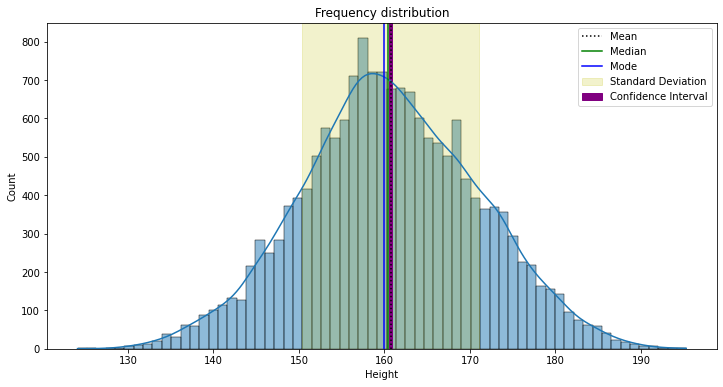

In [ ]:
# Histogram
ax = sns.histplot(x = 'VB17004', data = df, kde = True)

# Mean, median, mode, and std lines
ax.axvline(height_mean, color='black', linestyle=':', label='Mean')
ax.axvline(height_median, color='g', linestyle='-', label='Median')
ax.axvline(height_mode, color='b', linestyle='-', label='Mode')
ax.axvspan((height_mean + height_std), (height_mean - height_std), alpha=0.2, color='y', label='Standard Deviation')
ax.axvspan(lower_confidence_interval, upper_confidence_interval, alpha=1, color='purple', label='Confidence Interval')

# Parameters
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution')
ax.set_xlabel('Height')
plt.legend()

ax;

## Statistical tests (hypotesis)

In [ ]:
# Statistical libraries

from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums

In [ ]:
# Comparing the height distributions of males and females students through z-test
# If p-value = 0.0 the distributions differ, if p-value = 1.0 they are statistical similar

distribution_height_m = df.query('VB01001 == 1')['VB17004']
distribution_height_f = df.query('VB01001 == 2')['VB17004']

_ , p_value = ztest(distribution_height_m, distribution_height_f)
p_value

0.0

In [ ]:
# Normal test
# Verifying if the height distributions are normal 
# If p-value >= 0.05 = Normal; p-value < 0.05 = Not normal

_, p_value_normaltest_m = normaltest(distribution_height_m)
_, p_value_normaltest_f = normaltest(distribution_height_f)

print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [ ]:
# Verifying if the height distribuitions are equal (p-value >= 0.05)

ranksums(distribution_height_m, distribution_height_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

### Challenge 15: Perfom the hypothesis tests of other informations and explore the database

In [ ]:
distribution_weight_m = df.query('VB01001 == 1')['VB17003']
distribution_weight_f = df.query('VB01001 == 2')['VB17003']

_ , p_value = ztest(distribution_weight_m, distribution_weight_f)
p_value

4.663316252421833e-73

In [ ]:
_, p_value_normaltest_weight_m = normaltest(distribution_weight_m)
_, p_value_normaltest_weight_f = normaltest(distribution_weight_f)

print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [ ]:
ranksums(distribution_weight_m, distribution_weight_f)

RanksumsResult(statistic=17.215828551662888, pvalue=2.0203549297844372e-66)